In [1]:
%matplotlib inline 

import numpy as np
import pandas as pd
import matplotlib
matplotlib.style.use('ggplot')
import matplotlib.pyplot as plt

In [169]:
dfk = pd.read_csv("../markov_bench_k.txt")
dfk = dfk.rename(columns={'Score': 'time', 'Score Error (99.9%)':'std3','Param: k':'k','Param: modelName':'model', 'Benchmark':'method'})
dfk = dfk[['method','model','k','time','std3']]
dfk['method'] = dfk['method'].apply(lambda s: s.split(".")[-1])

In [170]:
dfk

method            model   k       time      std3
0   getRandomText      BruteMarkov   2  27.062449  1.558118
1   getRandomText  EfficientMarkov   2   1.533449  0.120878
2   getRandomText      BruteMarkov   3  26.303338  3.100724
3   getRandomText  EfficientMarkov   3   0.771461  0.121465
4   getRandomText      BruteMarkov   6  23.801087  1.806813
5   getRandomText  EfficientMarkov   6   0.588510  0.075981
6   getRandomText      BruteMarkov   9  23.764371  1.477198
7   getRandomText  EfficientMarkov   9   0.621420  0.088441
8   getRandomText      BruteMarkov  12  24.265949  2.195209
9   getRandomText  EfficientMarkov  12   0.697909  0.108149
10  getRandomText      BruteMarkov  15  24.668342  2.375924
11  getRandomText  EfficientMarkov  15   0.701416  0.099982
12  getRandomText      BruteMarkov  20  24.973311  1.711824
13  getRandomText  EfficientMarkov  20   0.905129  0.202646
14  getRandomText      BruteMarkov  25  23.872673  1.364879
15  getRandomText  EfficientMarkov  25   0.800072  0.077237
16  getRandomText      BruteMarkov  30  24.677063  3.812564
17  getRandomText  EfficientMarkov  30   0.920481  0.194057
18    setTraining      BruteMarkov   2   0.000004  0.000000
19    setTraining  EfficientMarkov   2   0.289994  0.052546
20    setTraining      BruteMarkov   3   0.000004  0.000000
21    setTraining  EfficientMarkov   3   0.367906  0.036564
22    setTraining      BruteMarkov   6   0.000004  0.000000
23    setTraining  EfficientMarkov   6   0.497230  0.053780
24    setTraining      BruteMarkov   9   0.000004  0.000000
25    setTraining  EfficientMarkov   9   0.471494  0.042860
26    setTraining      BruteMarkov  12   0.000004  0.000000
27    setTraining  EfficientMarkov  12   0.511627  0.044320
28    setTraining      BruteMarkov  15   0.000004  0.000000
29    setTraining  EfficientMarkov  15   0.512135  0.063510
30    setTraining      BruteMarkov  20   0.000004  0.000001
31    setTraining  EfficientMarkov  20   0.573843  0.071994
32    setTraining      BruteMarkov  25   0.000004  0.000000
33    setTraining  EfficientMarkov  25   0.604397  0.046968
34    setTraining      BruteMarkov  30   0.000004  0.000000
35    setTraining  EfficientMarkov  30   0.601952  0.060290

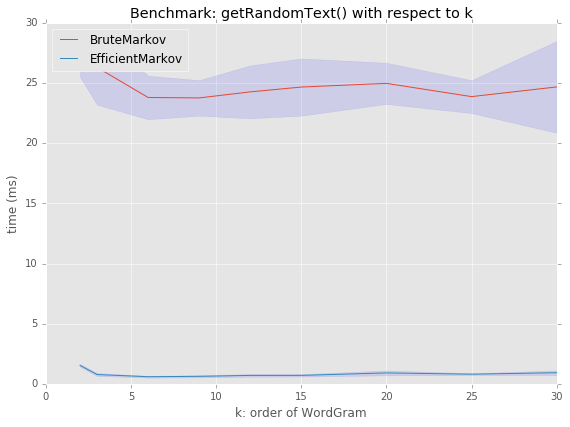

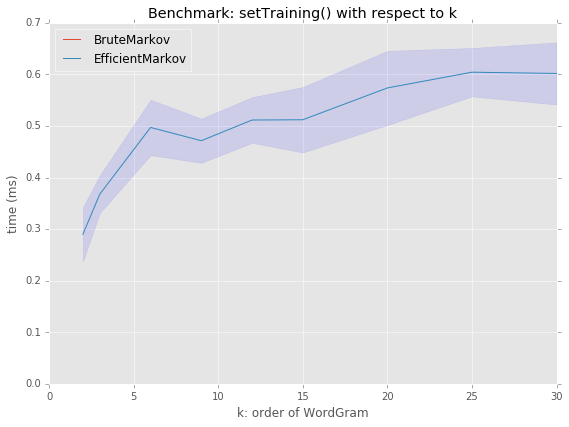

In [171]:
for method, group in dfk.groupby('method'):
    fig, ax = plt.subplots(figsize=(8,6))
    for model, g in group.groupby('model'):
        ax.plot(g['k'],g['time'],label=model)
        ax.fill_between(g['k'],g['time']-g['std3'],g['time']+g['std3'],alpha=0.10,color='blue')
    plt.title('Benchmark: {}() with respect to k'.format(method))
    plt.xlabel('k: order of WordGram')
    plt.ylabel('time (ms)')
    plt.legend(loc=2)
    fig.tight_layout()
    fig.savefig("{}_k.pdf".format(method))

plt.show()

In [90]:
df = pd.read_csv("../markov_bench_1.txt")
df = df.rename(columns={'Score': 'time', 'Score Error (99.9%)':'std3', 'Param: N':'N',
        'Param: T':'T', 'Param: modelName':'model', 'Benchmark':'method'})
df = df[['method','model','N','T','time','std3']]
df['method'] = df['method'].apply(lambda s : s.split(".")[-1])

In [91]:
df

method            model     N     T       time      std3
0   getRandomText      BruteMarkov  1000  1000   1.448797  0.138801
1   getRandomText  EfficientMarkov  1000  1000   0.132609  0.015713
2   getRandomText      BruteMarkov  1000  2000   3.229845  0.526686
3   getRandomText  EfficientMarkov  1000  2000   0.286992  0.044232
4   getRandomText      BruteMarkov  1000  4000   6.445762  0.908107
5   getRandomText  EfficientMarkov  1000  4000   0.508669  0.051090
6   getRandomText      BruteMarkov  1000  8000  11.802982  1.944172
7   getRandomText  EfficientMarkov  1000  8000   1.075554  0.161436
8   getRandomText      BruteMarkov  2000  1000   2.962560  0.235283
9   getRandomText  EfficientMarkov  2000  1000   0.134562  0.015740
10  getRandomText      BruteMarkov  2000  2000   5.922240  0.374756
11  getRandomText  EfficientMarkov  2000  2000   0.271359  0.038595
12  getRandomText      BruteMarkov  2000  4000  11.312972  1.122861
13  getRandomText  EfficientMarkov  2000  4000   0.615604  0.106101
14  getRandomText      BruteMarkov  2000  8000  23.767049  1.575177
15  getRandomText  EfficientMarkov  2000  8000   1.086331  0.096407
16  getRandomText      BruteMarkov  4000  1000   5.915889  0.349081
17  getRandomText  EfficientMarkov  4000  1000   0.152035  0.024870
18  getRandomText      BruteMarkov  4000  2000  12.064554  0.781866
19  getRandomText  EfficientMarkov  4000  2000   0.310188  0.059018
20  getRandomText      BruteMarkov  4000  4000  23.988642  2.583766
21  getRandomText  EfficientMarkov  4000  4000   0.611643  0.105728
22  getRandomText      BruteMarkov  4000  8000  46.431806  2.772450
23  getRandomText  EfficientMarkov  4000  8000   1.137661  0.094723
24  getRandomText      BruteMarkov  8000  1000  10.921366  1.007230
25  getRandomText  EfficientMarkov  8000  1000   0.165318  0.015485
26  getRandomText      BruteMarkov  8000  2000  22.832639  1.360441
27  getRandomText  EfficientMarkov  8000  2000   0.345357  0.049195
28  getRandomText      BruteMarkov  8000  4000  42.861438  2.151270
29  getRandomText  EfficientMarkov  8000  4000   0.679362  0.111203
..            ...              ...   ...   ...        ...       ...
34    setTraining      BruteMarkov  1000  2000   0.000005  0.000002
35    setTraining  EfficientMarkov  1000  2000   0.102239  0.016505
36    setTraining      BruteMarkov  1000  4000   0.000004  0.000000
37    setTraining  EfficientMarkov  1000  4000   0.113210  0.017522
38    setTraining      BruteMarkov  1000  8000   0.000004  0.000001
39    setTraining  EfficientMarkov  1000  8000   0.117204  0.023335
40    setTraining      BruteMarkov  2000  1000   0.000004  0.000000
41    setTraining  EfficientMarkov  2000  1000   0.236312  0.021768
42    setTraining      BruteMarkov  2000  2000   0.000004  0.000001
43    setTraining  EfficientMarkov  2000  2000   0.263074  0.039451
44    setTraining      BruteMarkov  2000  4000   0.000004  0.000001
45    setTraining  EfficientMarkov  2000  4000   0.279876  0.089044
46    setTraining      BruteMarkov  2000  8000   0.000004  0.000000
47    setTraining  EfficientMarkov  2000  8000   0.222219  0.028611
48    setTraining      BruteMarkov  4000  1000   0.000004  0.000000
49    setTraining  EfficientMarkov  4000  1000   0.533353  0.057888
50    setTraining      BruteMarkov  4000  2000   0.000004  0.000000
51    setTraining  EfficientMarkov  4000  2000   0.478971  0.044743
52    setTraining      BruteMarkov  4000  4000   0.000004  0.000001
53    setTraining  EfficientMarkov  4000  4000   0.473615  0.085829
54    setTraining      BruteMarkov  4000  8000   0.000004  0.000001
55    setTraining  EfficientMarkov  4000  8000   0.532910  0.101096
56    setTraining      BruteMarkov  8000  1000   0.000004  0.000001
57    setTraining  EfficientMarkov  8000  1000   1.005097  0.135736
58    setTraining      BruteMarkov  8000  2000   0.000004  0.000001
59    setTraining  EfficientMarkov  8000  2000   0.994700  0.115415
60    setTraining      BruteMarkov  8000  4000   0.000004  0.000000

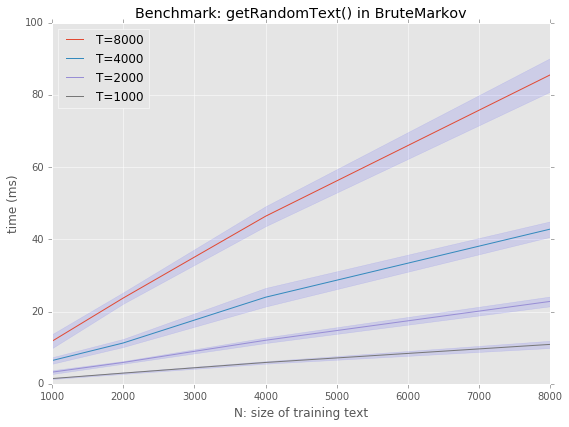

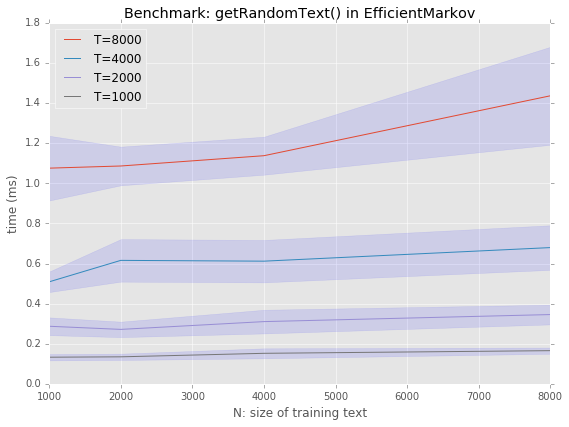

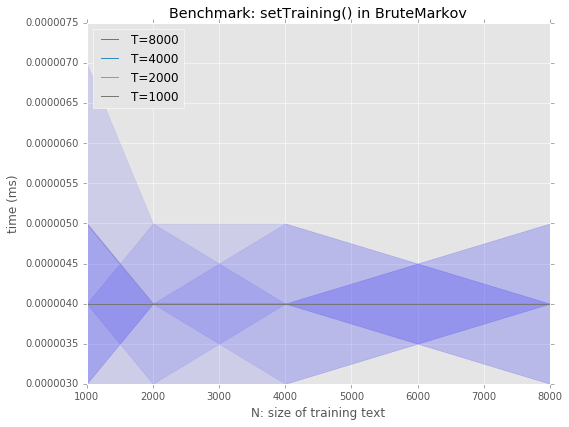

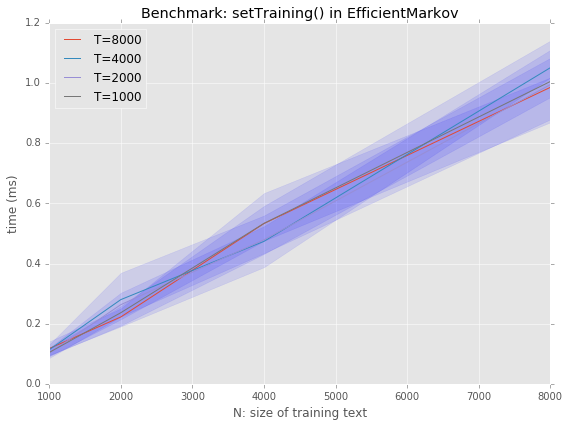

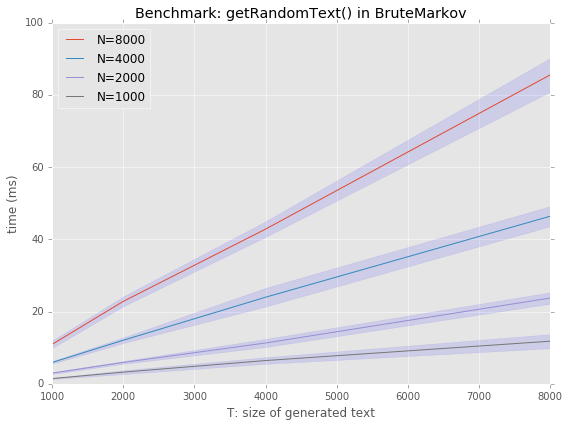

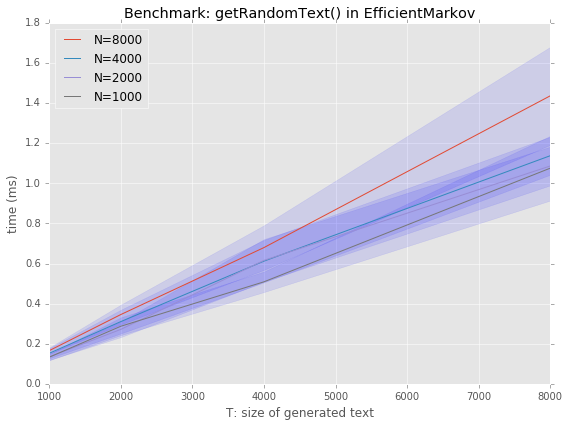

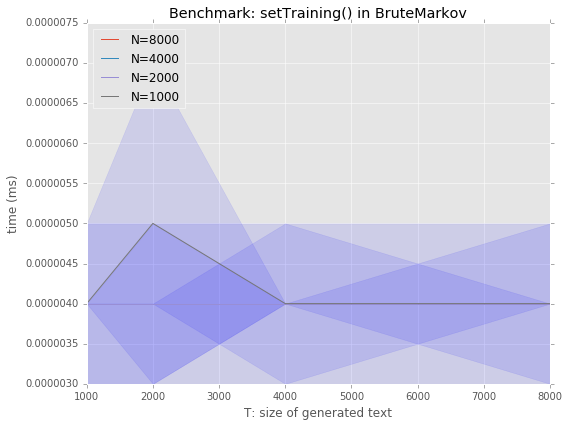

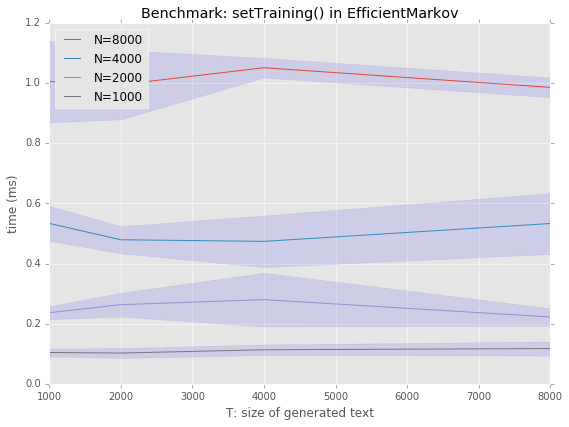

In [151]:
#fig, ax = plt.subplots(figsize=(8,6))

for (method, model), group in df.groupby(['method','model']):
    fig, ax = plt.subplots(figsize=(8,6))
    group = group.sort_values(by='T', ascending=False)
    for T, g in group.groupby('T', sort=False):
        ax.plot(g['N'],g['time'],label="T={}".format(T))
        ax.fill_between(g['N'],g['time']-g['std3'],g['time']+g['std3'],alpha=0.10,color='blue')
    plt.title('Benchmark: {}() in {}'.format(method,model))
    plt.xlabel('N: size of training text')
    plt.ylabel('time (ms)')
    plt.legend(loc=2)
    plt.tight_layout()
    fig.savefig("{}_{}_N.pdf".format(method,model))

for (method, model), group in df.groupby(['method','model']):
    fig, ax = plt.subplots(figsize=(8,6))
    group = group.sort_values(by='N', ascending=False)
    for N, g in group.groupby('N', sort=False):
        ax.plot(g['T'],g['time'],label="N={}".format(N))
        ax.fill_between(g['T'],g['time']-g['std3'],g['time']+g['std3'],alpha=0.10,color='blue')
    plt.title('Benchmark: {}() in {}'.format(method,model))
    plt.xlabel('T: size of generated text')
    plt.ylabel('time (ms)')
    plt.legend(loc=2)
    fig.tight_layout()
    fig.savefig("{}_{}_T.pdf".format(method,model))

plt.show()

In [2]:
dfmap = pd.read_csv("../map_bench_good.txt")
dfmap = dfmap.rename(columns={'Benchmark':'batch_size','Score':'time','Score Error (99.9%)':'std3',
        'Param: mapType': 'mapType'})
dfmap = dfmap[['batch_size','time','std3','mapType']]
dfmap['batch_size'] = dfmap['batch_size'].apply(lambda s : (int) (s.split("_")[-1]))
dfmap = dfmap.sort_values(by='batch_size')
dfmap['avg_time'] = dfmap['time'] / dfmap['batch_size']
dfmap

batch_size        time       std3          mapType  avg_time
26        5000    3.702866   0.557981          TreeMap  0.000741
25        5000    1.405435   0.182102          HashMap  0.000281
24        5000    1.015734   0.191075  IdentityHashMap  0.000203
0        10000    1.860551   0.280806  IdentityHashMap  0.000186
1        10000    2.809733   0.292479          HashMap  0.000281
2        10000    8.948891   1.162616          TreeMap  0.000895
12       20000    3.621838   0.447994  IdentityHashMap  0.000181
13       20000    5.338092   0.821568          HashMap  0.000267
14       20000   23.906024   6.198747          TreeMap  0.001195
23       40000   58.759995   4.763791          TreeMap  0.001469
22       40000   10.641273   1.609536          HashMap  0.000266
21       40000    7.209119   0.844712  IdentityHashMap  0.000180
29       60000  106.244674   8.684340          TreeMap  0.001771
28       60000   17.004894   1.753106          HashMap  0.000283
27       60000   13.456139   2.004179  IdentityHashMap  0.000224
30       80000   17.241998   3.094729  IdentityHashMap  0.000216
32       80000  161.207231  34.226653          TreeMap  0.002015
31       80000   21.445266   4.548972          HashMap  0.000268
5       100000  211.619293  10.841529          TreeMap  0.002116
4       100000   29.367302   2.852637          HashMap  0.000294
3       100000   27.506715   3.369746  IdentityHashMap  0.000275
8       120000  271.419529  22.015617          TreeMap  0.002262
7       120000   34.414114   3.804701          HashMap  0.000287
6       120000   30.716685   3.548540  IdentityHashMap  0.000256
11      160000  387.363090  20.101333          TreeMap  0.002421
10      160000   43.174682   6.587715          HashMap  0.000270
9       160000   36.714956   4.833605  IdentityHashMap  0.000229
17      200000  518.804837  45.270763          TreeMap  0.002594
15      200000   60.650724   5.934679  IdentityHashMap  0.000303
16      200000   57.666839   9.904723          HashMap  0.000288
18      240000   65.881609   7.007436  IdentityHashMap  0.000275
19      240000   66.316053   8.311935          HashMap  0.000276
20      240000  647.273893  33.511968          TreeMap  0.002697

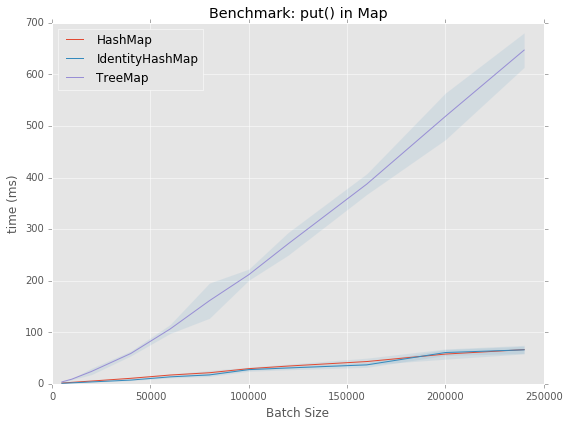

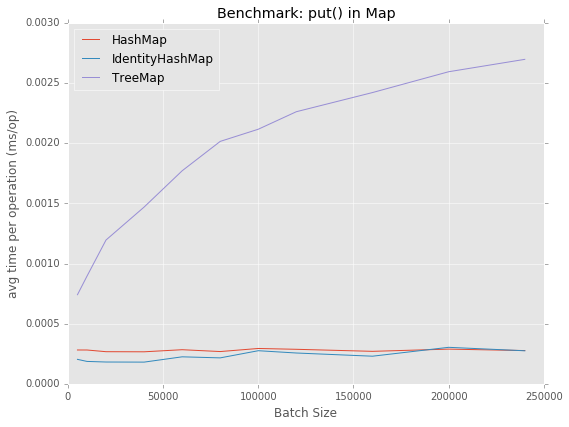

In [3]:
fig, ax = plt.subplots(figsize=(8,6))
for mapType, g in dfmap.groupby('mapType'):
    ax.plot(g['batch_size'],g['time'],label=mapType)
    ax.fill_between(g['batch_size'],g['time']-g['std3'],g['time']+g['std3'],alpha=0.10)
plt.title("Benchmark: put() in Map")
plt.xlabel("Batch Size")
plt.ylabel("time (ms)")
plt.legend(loc=2)
fig.tight_layout()
fig.savefig("bench_map_total.pdf")

fig, ax = plt.subplots(figsize=(8,6))
for mapType, g in dfmap.groupby('mapType'):
    ax.plot(g['batch_size'],g['avg_time'],label=mapType)
plt.title("Benchmark: put() in Map")
plt.xlabel("Batch Size")
plt.ylabel("avg time per operation (ms/op)")
plt.legend(loc=2)
fig.tight_layout()
fig.savefig("bench_map_avg.pdf")

plt.show();